<a href="https://colab.research.google.com/github/sofia-goncalves/Ising-RBM/blob/main/Copy_of_Ising_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📌 Code Overview: Monte Carlo Data Processing for RBM Training

This notebook processes Monte Carlo-generated data from the Ising model to prepare it for Restricted Boltzmann Machine (RBM) training and benchmarking.

## **1. Reading and Preparing Data**
### **1.1 Reading CSV Files**
- A `ReadCSV` function loads data from CSV files and converts them into NumPy arrays.
- These include:
  - `cMCMC`: Specific heat per spin
  - `mMCMC`: Magnetization per spin
  - `eMCMC`: Energy per spin
  - `temperatureLabelsMCMC`: Temperature labels for MCMC data

### **1.2 Loading Lattice Data**
- `latticesTotal`: Contains 7500 Monte Carlo-generated spin configurations of a 16×16 Ising model.
- Shape: **(7500, 256)** → Each lattice is stored as a 1D array of 256 spins.
- The values are converted from `{−1,1}` to `{0,1}` for compatibility with the RBM.

---

## **2. Computing Observables**
### **2.1 Lattice Size Calculation**
- Since each lattice has **256** spins, we infer that it represents a **16×16** grid.

### **2.2 Energy Calculation**
- The **LatticeEnergy** function calculates total energy using the Ising model Hamiltonian:
  $$
  E = - \sum_{\langle i,j \rangle} s_i s_j
  $$
  - Converts `{0,1}` spins back to `{−1,1}`.
  - Uses **periodic boundary conditions** to correctly compute nearest-neighbor interactions.

### **2.3 Magnetization Calculation**
- The **LatticeMagnetisation** function computes the total magnetization:
  $$
  M = \sum s_i
  $$

---

## **3. Processing the Lattices**
- We iterate over all 7500 lattices to compute:
  - **Magnetization per site**: $ \frac{|M|}{N} $
  - **Energy per site**: $ \frac{E}{N} $
- These values are stored in `maglist` and `elist` for later comparison.

---

## **4. Plotting Observables**
### **4.1 MCMC Reference Data**
- Monte Carlo results for **energy, magnetization, and specific heat** are plotted as functions of temperature.
  
### **4.2 Computed Observables from Lattice Data**
- The computed **magnetization and energy** (from raw lattice configurations) are plotted for comparison.

---

## **Summary**
✅ Reads and processes **Monte Carlo-generated spin configurations**  
✅ Computes **energy and magnetization per site**  
✅ Plots observables to compare **raw lattice data** with **MCMC reference results**  
✅ Prepares data for training an **RBM to learn the probability distribution of lattice configurations**  

# 📌 Understanding MCMC vs. Lattice Data: What's the Difference?

## **1. MCMC Data (300 Points)**
- **What is this data?**
  - Precomputed observables from Monte Carlo simulations of the Ising model at different temperatures.
  - Each data point corresponds to a single temperature.
  
- **Shape:** `(300, 1)` → One value per temperature.
- **Contains:**
  - `eMCMC`: Average energy per spin $ \langle E \rangle / N $
  - `mMCMC`: Average magnetization per spin $ \langle M \rangle / N $
  - `cMCMC`: Specific heat per spin $ c / N $
  
- **Why "per spin"?**
  - Normalizing by **total spins $N = 256$** allows for comparison across different system sizes.
  
- **Purpose:**
  - Provides a **smooth theoretical reference curve** to compare with the RBM’s learned distributions.

---

## **2. Lattice Data (7500 Configurations)**
- **What is this data?**
  - **Individual** Monte Carlo-generated **snapshots** (configurations) of 16×16 spin lattices.
  
- **Shape:** `(7500, 256)` → 7500 different lattice configurations, each flattened to 256 values.
- **Contains:** Raw spin states for each lattice.
- **Purpose:** Used to **train the RBM** to learn the probability distribution of spin configurations.

---

## **3. Computing Observables from Lattice Data**
- We compute magnetization and energy **for each of the 7500 lattices**:
  - **Magnetization per site**: $ \frac{|M|}{N} $
  - **Energy per site**: $ \frac{E}{N} $

| Feature         | MCMC Data (300 points) | Computed from 7500 Lattices |
|----------------|----------------------|----------------------------|
| **What it represents** | Averaged observables at a given temperature | Individual lattice configurations |
| **Number of values** | 300 (one per temperature) | 7500 (one per lattice) |
| **How it’s computed** | From Monte Carlo ensemble averaging | Directly from each sampled lattice |

---

## **4. The Role of Each Dataset**
| **Dataset**  | **Used for RBM Training?** | **Purpose** |
|-------------|------------------|----------|
| **MCMC Data (300 points)** | ❌ No | Provides a reference for observables as a function of temperature. |
| **Lattice Data (7500 samples)** | ✅ Yes | Trains the RBM by providing real microstates from Monte Carlo. |

---

## **5. What Comes Next?**
✅ **The RBM will be trained using the 7500 lattice samples.**  
✅ **Once trained, the RBM should generate new lattices that match Monte Carlo distributions.**  
✅ **We will compare RBM-generated observables with MCMC reference curves.**  

This is the key test of whether the RBM successfully captures the physics of the Ising model. 🚀  


## Why Use MCMC-Generated Data Instead of Theoretical Equations?
If we already have theoretical equations for magnetization, energy, and specific heat, why bother using MCMC-generated data instead? Here’s why:

### 1. Theoretical Curves Are Only Available in Special Cases
- Exact solutions exist only in 2D for some cases, like the Ising model (via Onsager’s solution).
- For more complex systems (e.g., 3D, frustrated lattices, external fields), no exact solution exists.
- Even in 2D, we often lack closed-form expressions for all observables, especially for finite-sized systems.
- Therefore, for many practical cases, theoretical equations don’t exist, and we need numerical methods like MCMC.

### 2. Finite-Size Effects Matter
- Theoretical equations often assume infinite system sizes (thermodynamic limit).
- Your lattices are 16×16 (finite), so they deviate from theoretical predictions due to finite-size effects.
- MCMC captures these effects, enabling a fair comparison between RBM and actual numerical simulations.

### 3. MCMC Provides a Realistic Benchmark for Machine Learning
- If we used theoretical curves directly, we wouldn’t account for:
  - Discretization effects (real simulations have finite resolutions).
  - Numerical noise and sampling errors (which affect real data).
- The RBM is trained on finite-size, sampled microstates, so we need finite-size MCMC results to compare fairly.

### 4. The MCMC Data Represents What the RBM Should Learn
- The RBM isn't expected to recover the exact theoretical equation; it learns a probabilistic model of real, finite-size lattices.
- The best test of the RBM is whether it can reproduce MCMC-obtained averages when we sample new lattices from it.

### TL;DR
- ✅ MCMC data serves as a realistic, finite-size benchmark.
- ✅ Theoretical equations aren’t always available, especially for finite systems.
- ✅ MCMC reflects the statistical noise and sampling that RBM should capture.

So while theoretical equations provide insight, they aren’t always the best direct comparison for machine learning models trained on finite, sampled data.


# Input / Output code

In [1]:
# -*- coding: utf-8 -*-
# Import necessary libraries
import csv as csv  # For reading and handling CSV files
import numpy as np  # For numerical operations, particularly on arrays
import matplotlib.pyplot as plt  # For plotting and visualization

def ReadCSV(fileLocation):
    '''
    Function to read the CSV data files.
    Inputs:
        - fileLocation (string): Path to the CSV file containing data.
    Outputs:
        - array (nparray): A numpy array of dimensions (#objects, length of each vector).
    '''
    with open(fileLocation, 'r') as csvFile:  # Open the file at the given location in read mode
        array = []  # Initialize an empty list to store rows of the dataset
        reader = csv.reader(csvFile)  # Create a CSV reader object to iterate through the file

        for row in reader:  # Loop through each row in the CSV file
            array.append(row)  # Append the row (as a list) to the array

        return np.array(array).astype(np.double)  # Convert the list of lists to a numpy array with type double

def PlotLattice(array, size, save=False, fileName=""):
    '''
    Function to visualize a 2D lattice structure as a heatmap.
    Inputs:
        - array (list): Flattened 1D array representing a 2D lattice structure.
        - size (int): The dimension (width and height) of the square lattice.
        - save (bool, optional): If True, saves the plot as a PDF file. Default is False.
        - fileName (string, optional): Name of the file to save the plot (if save is True). Default is an empty string.
    Outputs:
        - None (plots a heatmap of the lattice).
    '''
    # Reshape the 1D array into a 2D square array of dimensions (size x size)
    plt.imshow(array.reshape((size, size)), cmap='Greys', interpolation='nearest')
    if save:  # Check if the save option is enabled
        plt.savefig(fileName + ".pdf")  # Save the plot as a PDF with the specified filename
    plt.show()  # Display the heatmap


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# Importing and Plotting training data

# 1. MCMC Data

(300, 2)
(300, 2)
(300, 2)
(300, 1)


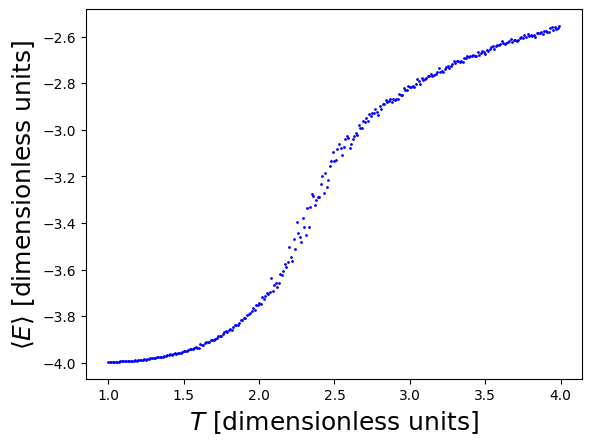

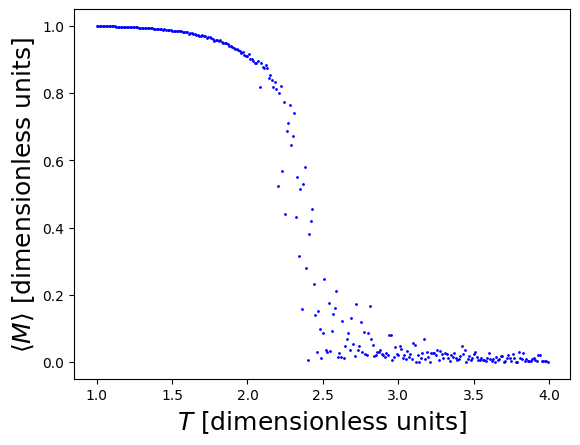

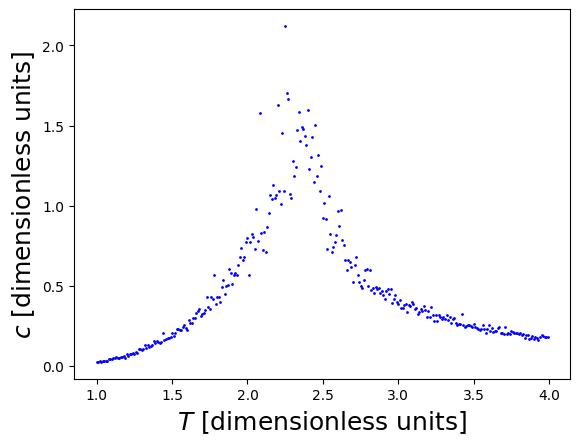

In [3]:
# -*- coding: utf-8 -*-
# Importing necessary libraries
import numpy as np  # For numerical operations and handling arrays
import matplotlib.pyplot as plt  # For plotting and visualization
from sklearn.neural_network import BernoulliRBM  # For implementing Restricted Boltzmann Machines (RBM)

'''
Import precomputed observables from Monte Carlo (MCMC) simulations for comparison with RBM results.
'''
cMCMC = ReadCSV('/content/drive/MyDrive/UGA/RBM_data/SpecificHeatPerSpin16.csv')  # Specific heat per spin from MCMC
print(cMCMC.shape)

mMCMC = ReadCSV('/content/drive/MyDrive/UGA/RBM_data/MagnetisationPerSpin16.csv')  # Magnetization per spin from MCMC
print(mMCMC.shape)

eMCMC = ReadCSV('/content/drive/MyDrive/UGA/RBM_data/EnergyPerSpin16.csv')  # Energy per spin from MCMC
print(eMCMC.shape)

temperatureLabelsMCMC = ReadCSV('/content/drive/MyDrive/UGA/RBM_data/TemperatureLabelsMCMC16.csv')  # Temperature labels for MCMC data
print(temperatureLabelsMCMC.shape)

# Extracting the first element from each list of observables
cMCMC = [x[0] for x in cMCMC]
mMCMC = [x[0] for x in mMCMC]
eMCMC = [x[0] for x in eMCMC]

# Plot and save the energy versus temperature from MCMC data
plt.plot(temperatureLabelsMCMC, eMCMC, 'bo', markersize=1)
plt.xlabel(r'$T$ [dimensionless units]', fontsize=18)
plt.ylabel(r'$\langle E \rangle$ [dimensionless units]', fontsize=18)
plt.savefig("eMCMC.pdf")
plt.show()

# Plot and save the magnetization versus temperature from MCMC data
plt.plot(temperatureLabelsMCMC, np.abs(mMCMC), 'bo', markersize=1)
plt.xlabel(r'$T$ [dimensionless units]', fontsize=18)
plt.ylabel(r'$\langle M \rangle$ [dimensionless units]', fontsize=18)
plt.savefig("mMCMC.pdf")
plt.show()

# Plot and save the specific heat versus temperature from MCMC data
plt.plot(temperatureLabelsMCMC, cMCMC, 'bo', markersize=1)
plt.xlabel(r'$T$ [dimensionless units]', fontsize=18)
plt.ylabel(r'$c$ [dimensionless units]', fontsize=18)
plt.savefig("cMCMC.pdf")
plt.show()


# 2. Lattice configuration data - calculating M, E for all configurations and plotting

(7500, 256)
7500


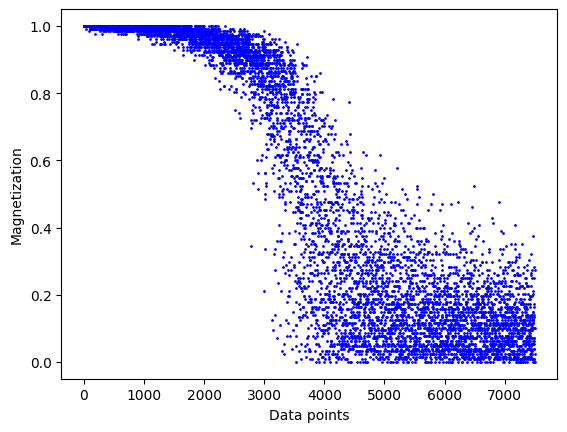

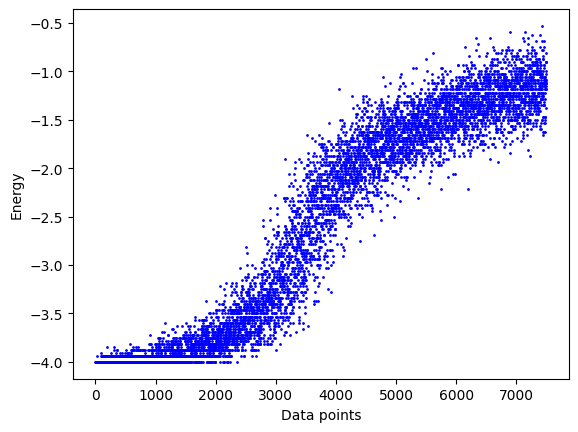

In [4]:
'''
Function to calculate the total energy of a lattice.
The lattice is reshaped into 2D and periodic boundary conditions are applied.
'''
def LatticeEnergy(lattice, size):
    Energy = 0
    lattice = (2 * lattice) - 1  # Convert {0, 1} back to {-1, 1} for calculations
    lattice = np.reshape(lattice, (size, size))  # Reshape the lattice to 2D

    # Iterate over all lattice sites and calculate interaction energy with neighbors
    for i in range(size):
        for j in range(size):
            Energy += -1 * lattice[i, j] * (
                lattice[(i + 1) % size, j] + lattice[(i - 1) % size, j] + lattice[i, (j + 1) % size] + lattice[i, (j - 1) % size]
            )

    return Energy

'''
Function to calculate the total magnetization of a lattice.
The magnetization is computed as the sum of all spins.
'''
def LatticeMagnetisation(lattice, size):
    lattice = (2 * lattice) - 1  # Convert {0, 1} back to {-1, 1}
    return np.sum(lattice)


'''
Import the generated lattice configurations and corresponding temperature labels.
Convert lattice values from {-1, -1} to {0, 1}, as the RBM model expects binary input values.
'''
latticesTotal = ReadCSV('/content/drive/MyDrive/UGA/RBM_data/Lattices16.csv')  # Read lattice configurations from a CSV file

# Calculate lattice size based on the length of one flattened lattice vector
latticeSize = int(len(latticesTotal[0]) ** (1 / 2))

# Print the shape of the lattice dataset for verification
print(latticesTotal.shape)

latticesTotal = (latticesTotal + 1) / 2  # Convert from {-1, 1} to {0, 1}

'''
Calculate and plot the energy and magnetization for each lattice in the dataset.
'''

maglist = []  # List to store magnetization values
elist = []  # List to store energy values

# Compute magnetization and energy for each lattice
for lattice in latticesTotal:
    maglist.append(np.abs(LatticeMagnetisation(lattice, latticeSize)) / (latticeSize ** 2))
    elist.append(LatticeEnergy(lattice, latticeSize) / (latticeSize ** 2))

print(len(maglist))

# Plot magnetization values
plt.plot(maglist, 'bo', markersize=1)
plt.xlabel('Data points')
plt.ylabel('Magnetization')
plt.savefig("mag.pdf")
plt.show()

# Plot energy values
plt.plot(elist, 'bo', markersize=1)
plt.xlabel('Data points')
plt.ylabel('Energy')
plt.savefig("energy.pdf")
plt.show()


# Training the RBM using lattice configuration data

(7500, 1)
Temperature: 1.0
Temperature: 1.1
Temperature: 1.2
Temperature: 1.3
Temperature: 1.4
Temperature: 1.5
Temperature: 1.6
Temperature: 1.7
Temperature: 1.8
Temperature: 1.9
Temperature: 2.0
Temperature: 2.1
Temperature: 2.2
Temperature: 2.3
Temperature: 2.4
Temperature: 2.5
Temperature: 2.6
Temperature: 2.7
Temperature: 2.8
Temperature: 2.9
Temperature: 3.0
Temperature: 3.1
Temperature: 3.2
Temperature: 3.3
Temperature: 3.4
Temperature: 3.5
Temperature: 3.6
Temperature: 3.7
Temperature: 3.8
Temperature: 3.9
Temperature: 1.0
Temperature: 1.1
Temperature: 1.2
Temperature: 1.3
Temperature: 1.4
Temperature: 1.5
Temperature: 1.6
Temperature: 1.7
Temperature: 1.8
Temperature: 1.9
Temperature: 2.0
Temperature: 2.1
Temperature: 2.2
Temperature: 2.3
Temperature: 2.4
Temperature: 2.5
Temperature: 2.6
Temperature: 2.7
Temperature: 2.8
Temperature: 2.9
Temperature: 3.0
Temperature: 3.1
Temperature: 3.2
Temperature: 3.3
Temperature: 3.4
Temperature: 3.5
Temperature: 3.6
Temperature: 3.7
Temp

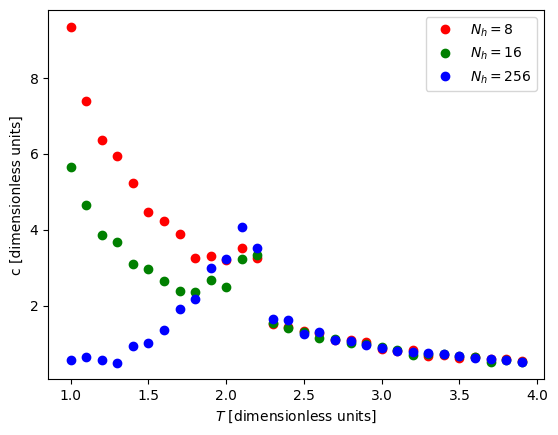

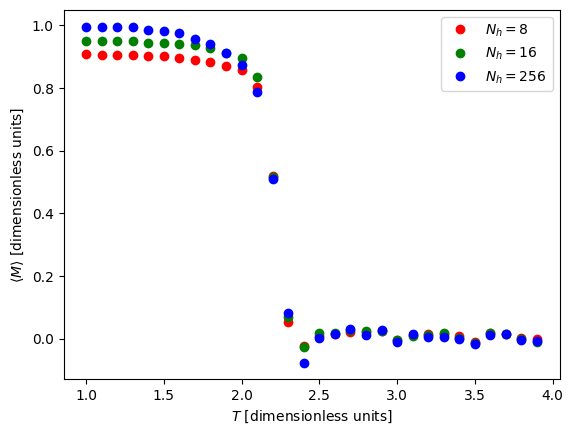

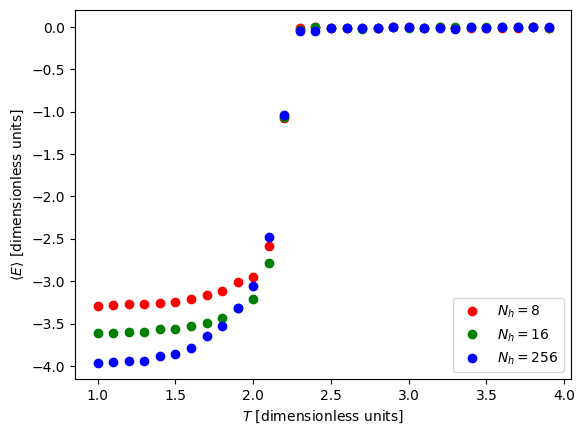

In [5]:
temperatureLabels = ReadCSV('/content/drive/MyDrive/UGA/RBM_data/TemperatureLabels16.csv')  # Load temperature labels corresponding to each lattice configuration
print(temperatureLabels.shape)  # Print the shape of the loaded temperature labels to verify correctness

# Extract unique temperature values and determine how many samples were taken per temperature
tempList = np.unique(temperatureLabels, return_counts=True)[0]  # List of unique temperature values
nItr = np.unique(temperatureLabels, return_counts=True)[1][0]  # Number of samples (iterations) per temperature

'''
Reshape the lattice configurations and temperature labels into a structured format for processing.
Each temperature's configurations are grouped together for easier RBM training and analysis.
'''
latticesTotal = np.reshape(latticesTotal, (len(tempList), nItr, latticeSize ** 2))  # Reshape lattice data by temperature
temperatureLabels = np.reshape(temperatureLabels, (len(tempList), nItr))  # Reshape labels to match the new structure

# Initialize lists to store observables (magnetization, energy) and their variances
magnetisationVariance = []  # Variance of magnetization for each temperature
energyVariance = []  # Variance of energy for each temperature
magnetisation = []  # Average magnetization per spin for each temperature
energy = []  # Average energy per spin for each temperature

'''
Train an RBM for each temperature and compute physical observables using generated samples.
This process is repeated for different numbers of hidden nodes in the RBM.
'''
numberHiddenNodes = [8, 16, 256]  # Different RBM configurations with varying numbers of hidden nodes

for h in range(len(numberHiddenNodes)):
    # Temporary storage for observables corresponding to this RBM configuration
    magnetisationOneTemperature = []
    energyOneTemperature = []
    magnetisationVarianceOneTemperature = []
    energyVarianceOneTemperature = []
    temperatureCounter = 0  # Index to track temperature in loops

    for latticeOneTemperature in latticesTotal:
        temperature = temperatureLabels[temperatureCounter, 0]  # Extract current temperature
        print("Temperature: " + str(temperature))  # Display the temperature being processed

        # Train an RBM on the lattice configurations at this temperature
        rbm = BernoulliRBM(n_components=numberHiddenNodes[h], learning_rate=0.001, verbose=False, n_iter=100, batch_size=10)
        rbm.fit(latticeOneTemperature)  # Fit the RBM to the training data

        '''
        # Visualize the trained RBM's weight matrix (hidden-visible connections)
        plt.imshow(rbm.components_)
        plt.ylabel("Hidden nodes")
        plt.xlabel("Visible nodes")
        plt.savefig("weightsTemp" + str(temperature) + "Nh" + str(numberHiddenNodes[h]) + ".pdf")
        plt.show()
        '''

        # Generate new samples using Gibbs sampling and compute observables
        magnetisationSampleList = []  # Store magnetization values from generated samples
        energySampleList = []  # Store energy values from generated samples
        randomlattice = np.random.randint(2, size=latticeSize ** 2)  # Initialize a random lattice configuration
        equilibrationTime = 1000  # Number of steps before collecting samples (to reach equilibrium)
        numberSamples = 1000  # Number of samples to generate after equilibration

        # Perform Gibbs sampling to generate new spin configurations
        for i in range(equilibrationTime * latticeSize ** 2 + numberSamples * latticeSize ** 2):
            lattice = rbm.gibbs(randomlattice)  # Generate a new lattice configuration
            # After equilibration, collect samples at intervals of latticeSize^2
            if i > equilibrationTime * latticeSize ** 2 and i % latticeSize ** 2 == 0:
                magnetisationSampleList.append(LatticeMagnetisation(lattice, latticeSize) / latticeSize ** 2)  # Normalize by lattice size
                energySampleList.append(LatticeEnergy(lattice, latticeSize))  # Compute energy

        # Compute the average and variance of magnetization and energy
        magnetisationOneTemperature.append(np.average(magnetisationSampleList))  # Mean magnetization
        energyOneTemperature.append(np.average(energySampleList) / latticeSize ** 2)  # Mean energy per spin
        magnetisationVarianceOneTemperature.append((latticeSize ** 2 / temperature) * np.var(magnetisationSampleList))  # Magnetization variance (related to susceptibility)
        energyVarianceOneTemperature.append((1 / (temperature ** 2 * latticeSize ** 2)) * np.var(energySampleList))  # Energy variance (related to specific heat)

        temperatureCounter += 1  # Move to the next temperature

    # Store the computed observables for this RBM configuration
    magnetisation.append(magnetisationOneTemperature)
    energy.append(energyOneTemperature)
    magnetisationVariance.append(magnetisationVarianceOneTemperature)
    energyVariance.append(energyVarianceOneTemperature)

# Define colors for plotting different RBM configurations
colours = ['ro', 'go', 'bo']

# Plot specific heat (energy variance) vs temperature
for i in range(len(numberHiddenNodes)):
    plt.plot(tempList, energyVariance[i], colours[i])
plt.ylabel("c [dimensionless units]")  # Specific heat label
plt.xlabel(r'$T$ [dimensionless units]')  # Temperature axis
plt.legend([r'$N_h = 8$', r'$N_h = 16$', r'$N_h = 256$'], loc='upper right')  # Legend for different RBM sizes
plt.savefig("cRBM.pdf")
plt.show()

# Plot average magnetization vs temperature
for i in range(len(numberHiddenNodes)):
    plt.plot(tempList, magnetisation[i], colours[i])
plt.ylabel(r'$\langle M \rangle$ [dimensionless units]')  # Magnetization label
plt.xlabel(r'$T$ [dimensionless units]')  # Temperature axis
plt.legend([r'$N_h = 8$', r'$N_h = 16$', r'$N_h = 256$'], loc='upper right')  # Legend
plt.savefig("magRBM.pdf")
plt.show()

# Plot average energy vs temperature
for i in range(len(numberHiddenNodes)):
    plt.plot(tempList, energy[i], colours[i])
plt.ylabel(r'$\langle E \rangle$ [dimensionless units]')  # Energy label
plt.xlabel(r'$T$ [dimensionless units]')  # Temperature axis
plt.legend([r'$N_h = 8$', r'$N_h = 16$', r'$N_h = 256$'], loc='lower right')  # Legend
plt.savefig("eRBM.pdf")
plt.show()
